# Caraterization Final Clustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import math
import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [ ]:
mini_df = pd.read_excel("/content/drive/MyDrive/10.Applied Pratice/Trabalho_final_tlantic_grupo_4/Finais!!!/Clustering - final/Caracterization_cluster_data.xlsx")

mini_df.head()

,LOJA,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja,4 Clusters
0,Caldas da Rainha,12620.49,5767.5,11958.99,14286.06,2760,7,12118.56,Mini
1,Campera,17178.43,7043.1,15373.27,21718.96,3225,12,15576.91,Mini
2,Canidelo,20187.40,8222.9,19269.17,22492.35,3145,13,18717.85,Mini
3,Faro Mercado,21786.80,10453.5,21440.04,22658.11,3386,11,21192.23,Mini
4,Guarda,16847.69,8021.0,16934.55,16629.22,3215,11,16394.50,Mini


In [ ]:
mini_df.shape

(70, 9)

In [ ]:
mini_df.describe()

,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,43938.065143,14775.237143,41147.863857,50960.260857,11030.942857,25.414286,41113.481571
std,56695.699691,17052.537257,52629.385872,67131.925053,13517.317611,19.908117,52796.535276
min,2563.190000,1458.600000,2644.840000,2259.600000,2523.000000,7.000000,2476.490000
25%,5071.792500,2716.400000,5067.152500,4733.715000,2977.250000,13.000000,4847.012500
50%,8273.920000,4363.200000,8175.870000,8390.005000,3338.000000,15.000000,7979.735000
75%,75983.442500,26063.075000,71033.277500,89303.032500,13769.250000,30.750000,70812.932500
max,272020.210000,80997.900000,257773.950000,308018.450000,48810.000000,100.000000,256915.730000


In [ ]:
group = mini_df.groupby('4 Clusters')

<ipython-input-33-17116b0ae7cb>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y='4 Clusters', data=mini_df, orient='h', palette=palette, legend=False)  # Boxplot para cada coluna
<ipython-input-33-17116b0ae7cb>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y='4 Clusters', data=mini_df, orient='h', palette=palette, legend=False)  # Boxplot para cada coluna
<ipython-input-33-17116b0ae7cb>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y='4 Clusters', data=mini_df, orient='h', palette=palette, legend=Fal

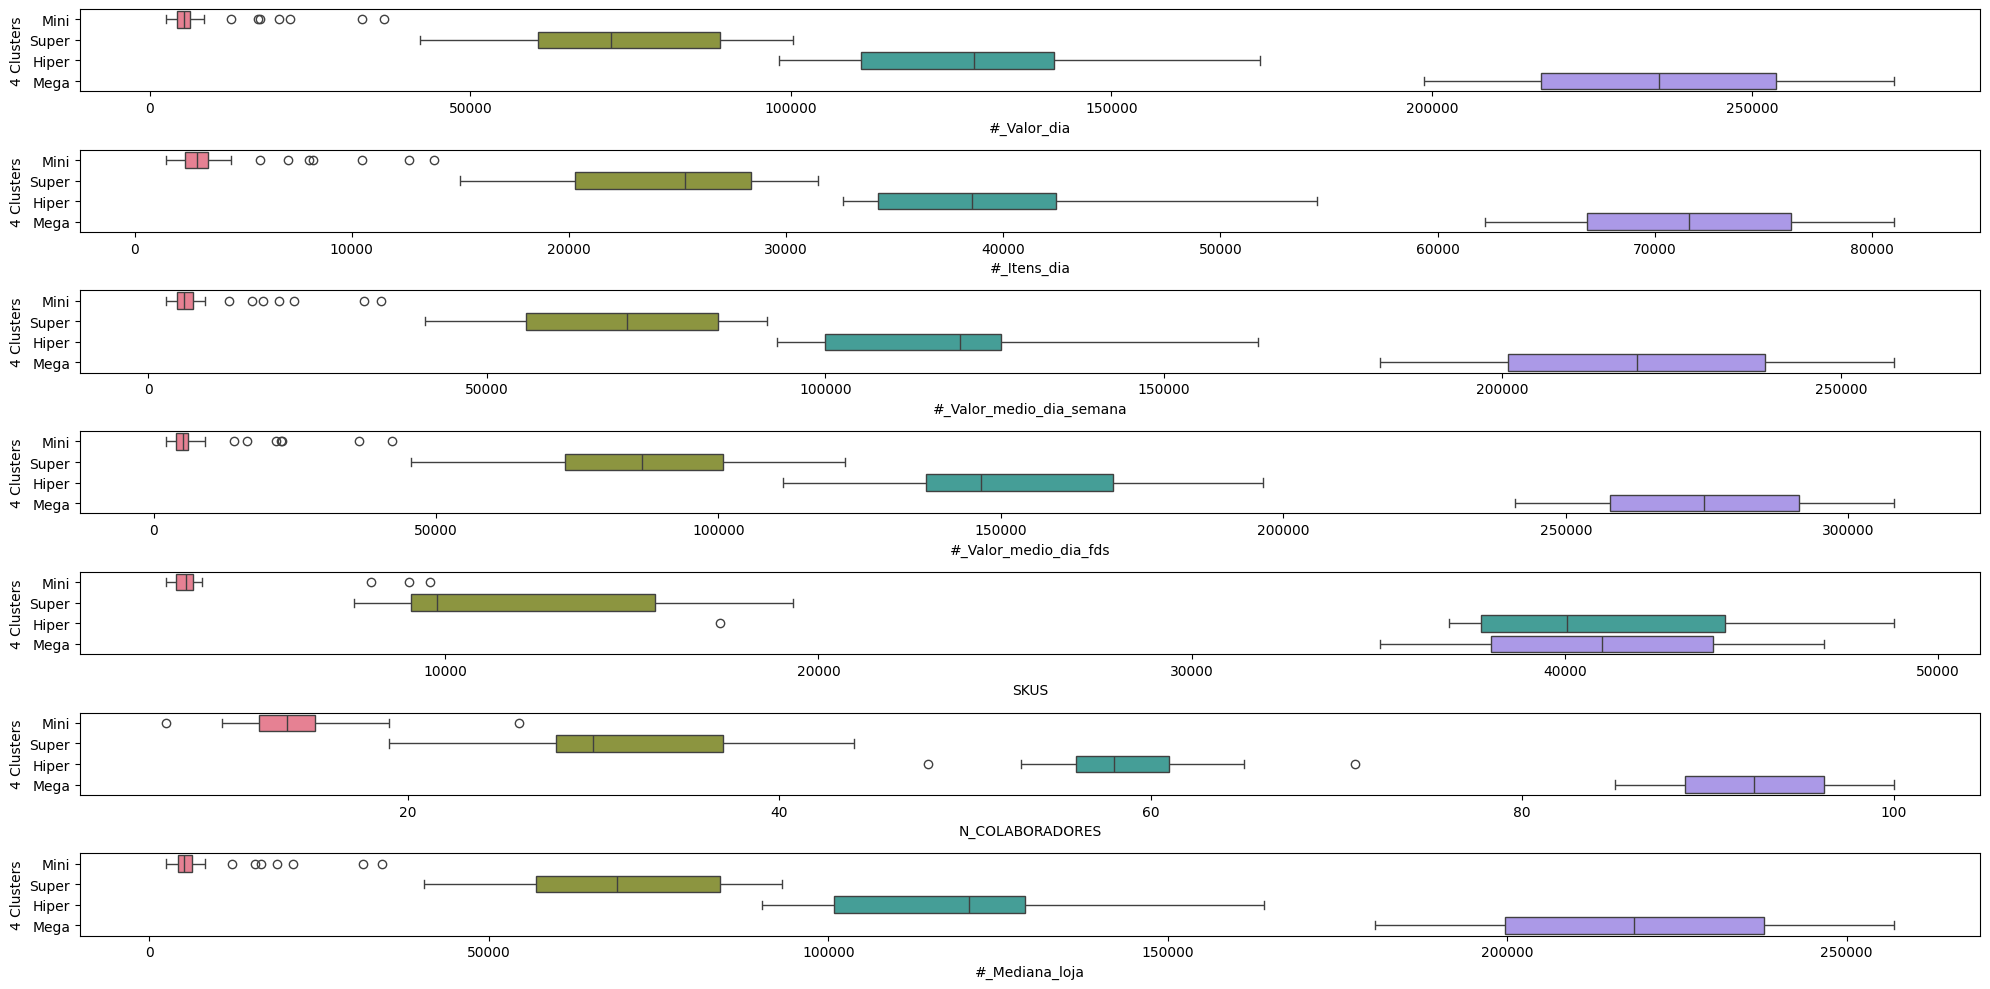

In [ ]:
relevant_columns = mini_df.columns[1:-1]
mini_df_relevant = mini_df[relevant_columns]

group = mini_df.groupby('4 Clusters')

num_columns = len(relevant_columns)

palette = sns.color_palette("husl", n_colors=len(group))

plt.figure(figsize=(20, 10))

for i, column in enumerate(relevant_columns):
    plt.subplot(num_columns, 1, i+1)
    sns.boxplot(x=column, y='4 Clusters', data=mini_df, orient='h', palette=palette, legend=False)

plt.tight_layout()
plt.show()

In [ ]:
group['#_Valor_dia'].describe()

,count,mean,std,min,25%,50%,75%,max
4 Clusters,,,,,,,,
Hiper,9.0,128093.131111,23397.464944,98151.45,110872.8400,128581.200,141001.1700,173112.48
Mega,2.0,235353.715000,51854.254514,198687.22,217020.4675,235353.715,253686.9625,272020.21
Mini,44.0,7809.710000,7428.240542,2563.19,4285.6825,5302.925,6340.6550,36582.52
Super,15.0,73899.447333,17803.457438,42154.27,60538.9300,71888.900,88869.5050,100263.83


In [ ]:
# Outliers #_Valor_dia
mini_df[(mini_df['#_Valor_dia'] > 15000) & (mini_df['4 Clusters'] == 'Mini')]

,LOJA,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja,4 Clusters
1,Campera,17178.43,7043.1,15373.27,21718.96,3225,12,15576.91,Mini
2,Canidelo,20187.40,8222.9,19269.17,22492.35,3145,13,18717.85,Mini
3,Faro Mercado,21786.80,10453.5,21440.04,22658.11,3386,11,21192.23,Mini
4,Guarda,16847.69,8021.0,16934.55,16629.22,3215,11,16394.50,Mini
41,Eiras,33117.66,12614.2,31822.04,36376.55,9014,19,31390.51,Mini
43,Santo Tirso,36582.52,13807.5,34320.31,42272.69,9585,19,34295.02,Mini


In [ ]:
group['#_Itens_dia'].describe()

,count,mean,std,min,25%,50%,75%,max
4 Clusters,,,,,,,,
Hiper,9.0,39985.866667,6795.178139,32610.4,34221.100,38572.20,42447.200,54436.8
Mega,2.0,71580.750000,13317.861249,62163.6,66872.175,71580.75,76289.325,80997.9
Mini,44.0,3802.486364,2784.230137,1458.6,2337.575,2854.10,3384.125,13807.5
Super,15.0,24261.526667,5091.538078,15000.6,20259.200,25324.70,28370.850,31476.8


In [ ]:
# Outliers #_Itens_dia
mini_df[(mini_df['#_Itens_dia'] > 5000) & (mini_df['4 Clusters'] == 'Mini')]

,LOJA,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja,4 Clusters
0,Caldas da Rainha,12620.49,5767.5,11958.99,14286.06,2760,7,12118.56,Mini
1,Campera,17178.43,7043.1,15373.27,21718.96,3225,12,15576.91,Mini
2,Canidelo,20187.40,8222.9,19269.17,22492.35,3145,13,18717.85,Mini
3,Faro Mercado,21786.80,10453.5,21440.04,22658.11,3386,11,21192.23,Mini
4,Guarda,16847.69,8021.0,16934.55,16629.22,3215,11,16394.50,Mini
41,Eiras,33117.66,12614.2,31822.04,36376.55,9014,19,31390.51,Mini
43,Santo Tirso,36582.52,13807.5,34320.31,42272.69,9585,19,34295.02,Mini


In [ ]:
group['#_Valor_medio_dia_semana'].describe()

,count,mean,std,min,25%,50%,75%,max
4 Clusters,,,,,,,,
Hiper,9.0,118361.526667,22881.532382,92872.56,99867.9700,119815.570,125937.4100,163883.37
Mega,2.0,219820.505000,53674.276658,181867.06,200843.7825,219820.505,238797.2275,257773.95
Mini,44.0,7713.420455,6984.197146,2644.84,4197.4800,5314.490,6621.9700,34320.31
Super,15.0,69071.014667,15959.832929,40819.56,55814.3950,70681.400,84097.6450,91444.41


In [ ]:
# Outliers #_Valor_medio_dia_semana
mini_df[(mini_df['#_Valor_medio_dia_semana'] > 10000) & (mini_df['4 Clusters'] == 'Mini')]

,LOJA,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja,4 Clusters
0,Caldas da Rainha,12620.49,5767.5,11958.99,14286.06,2760,7,12118.56,Mini
1,Campera,17178.43,7043.1,15373.27,21718.96,3225,12,15576.91,Mini
2,Canidelo,20187.40,8222.9,19269.17,22492.35,3145,13,18717.85,Mini
3,Faro Mercado,21786.80,10453.5,21440.04,22658.11,3386,11,21192.23,Mini
4,Guarda,16847.69,8021.0,16934.55,16629.22,3215,11,16394.50,Mini
41,Eiras,33117.66,12614.2,31822.04,36376.55,9014,19,31390.51,Mini
43,Santo Tirso,36582.52,13807.5,34320.31,42272.69,9585,19,34295.02,Mini


In [ ]:
group['#_Valor_medio_dia_fds'].describe()

,count,mean,std,min,25%,50%,75%,max
4 Clusters,,,,,,,,
Hiper,9.0,152573.755556,26524.176401,111402.57,136787.65,146476.93,169821.0500,196302.97
Mega,2.0,274496.330000,47407.436743,240974.21,257735.27,274496.33,291257.3900,308018.45
Mini,44.0,8051.858182,8589.468322,2259.60,4027.79,5204.44,6131.9575,42272.69
Super,15.0,86052.002667,23250.306713,45511.48,72803.48,86406.93,100872.2050,122424.87


In [ ]:
# Outliers #_Valor_medio_dia_fds
mini_df[(mini_df['#_Valor_medio_dia_fds'] > 15000) & (mini_df['4 Clusters'] == 'Mini')]

,LOJA,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja,4 Clusters
1,Campera,17178.43,7043.1,15373.27,21718.96,3225,12,15576.91,Mini
2,Canidelo,20187.40,8222.9,19269.17,22492.35,3145,13,18717.85,Mini
3,Faro Mercado,21786.80,10453.5,21440.04,22658.11,3386,11,21192.23,Mini
4,Guarda,16847.69,8021.0,16934.55,16629.22,3215,11,16394.50,Mini
41,Eiras,33117.66,12614.2,31822.04,36376.55,9014,19,31390.51,Mini
43,Santo Tirso,36582.52,13807.5,34320.31,42272.69,9585,19,34295.02,Mini


In [ ]:
group['SKUS'].describe()

,count,mean,std,min,25%,50%,75%,max
4 Clusters,,,,,,,,
Hiper,9.0,39167.000000,9219.990049,17367.0,37764.00,40050.0,44281.00,48810.0
Mega,2.0,41001.500000,8413.863589,35052.0,38026.75,41001.5,43976.25,46951.0
Mini,44.0,3401.840909,1532.160914,2523.0,2776.50,3058.0,3251.25,9585.0
Super,15.0,12531.933333,4138.565201,7562.0,9093.00,9774.0,15608.00,19311.0


In [ ]:
# Outliers SKUS
mini_df[(mini_df['SKUS'] > 5000) & (mini_df['4 Clusters'] == 'Mini')]

,LOJA,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja,4 Clusters
41,Eiras,33117.66,12614.2,31822.04,36376.55,9014,19,31390.51,Mini
42,S - Almirante Reis,8234.16,4290.8,8397.49,7823.35,8009,26,8040.75,Mini
43,Santo Tirso,36582.52,13807.5,34320.31,42272.69,9585,19,34295.02,Mini


In [ ]:
group['N_COLABORADORES'].describe()

,count,mean,std,min,25%,50%,75%,max
4 Clusters,,,,,,,,
Hiper,9.0,58.888889,6.641620,48.0,56.00,58.0,61.00,71.0
Mega,2.0,92.500000,10.606602,85.0,88.75,92.5,96.25,100.0
Mini,44.0,13.613636,3.005545,7.0,12.00,13.5,15.00,26.0
Super,15.0,31.000000,7.615773,19.0,28.00,30.0,37.00,44.0


In [ ]:
# Outliers N_COLABORADORES above
mini_df[(mini_df['N_COLABORADORES'] > 20) & (mini_df['4 Clusters'] == 'Mini')]

,LOJA,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja,4 Clusters
42,S - Almirante Reis,8234.16,4290.8,8397.49,7823.35,8009,26,8040.75,Mini


In [ ]:
# Outliers N_COLABORADORES below
mini_df[(mini_df['N_COLABORADORES'] < 10) & (mini_df['4 Clusters'] == 'Mini')]

,LOJA,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja,4 Clusters
0,Caldas da Rainha,12620.49,5767.5,11958.99,14286.06,2760,7,12118.56,Mini


In [ ]:
# Outliers N_COLABORADORES above - Hiper
mini_df[(mini_df['N_COLABORADORES'] < 50) & (mini_df['4 Clusters'] == 'Hiper')]

,LOJA,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja,4 Clusters
59,Alverca,134050.97,38572.2,119815.57,169821.05,17367,48,123114.09,Hiper


In [ ]:
# Outliers N_COLABORADORES below - Hiper
mini_df[(mini_df['N_COLABORADORES'] > 70) & (mini_df['4 Clusters'] == 'Hiper')]

,LOJA,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja,4 Clusters
66,Setúbal,173112.48,54436.8,163883.37,196302.97,44281,71,164135.18,Hiper


In [ ]:
group['#_Mediana_loja'].describe()

,count,mean,std,min,25%,50%,75%,max
4 Clusters,,,,,,,,
Hiper,9.0,118746.211111,23693.689868,90174.65,100869.5500,120710.400,129020.5500,164135.18
Mega,2.0,218740.715000,53987.623957,180565.70,199653.2075,218740.715,237828.2225,256915.73
Mini,44.0,7503.342045,6971.425680,2476.49,4162.3400,5143.960,6246.3375,34295.02
Super,15.0,69439.955333,16378.546192,40423.41,56983.5000,68887.660,83986.6000,93179.54


In [ ]:
# Outliers #_Mediana_loja
mini_df[(mini_df['#_Mediana_loja'] > 9000) & (mini_df['4 Clusters'] == 'Mini')]

,LOJA,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja,4 Clusters
0,Caldas da Rainha,12620.49,5767.5,11958.99,14286.06,2760,7,12118.56,Mini
1,Campera,17178.43,7043.1,15373.27,21718.96,3225,12,15576.91,Mini
2,Canidelo,20187.40,8222.9,19269.17,22492.35,3145,13,18717.85,Mini
3,Faro Mercado,21786.80,10453.5,21440.04,22658.11,3386,11,21192.23,Mini
4,Guarda,16847.69,8021.0,16934.55,16629.22,3215,11,16394.50,Mini
41,Eiras,33117.66,12614.2,31822.04,36376.55,9014,19,31390.51,Mini
43,Santo Tirso,36582.52,13807.5,34320.31,42272.69,9585,19,34295.02,Mini
